In [1]:
#import MAnorm2 packages
library(MAnorm2)
library(statmod)
library(scales)
library(RColorBrewer)
library(edgeR)
library(preprocessCore)
library(extrafont)

#calculate single end p-value
single.end.pvalue<-function(biocond){
    df<-attr(biocond,"df")
    p.value<-pf(biocond$fold.change,df[1],df[2],lower.tail=F)
    return(p.value)
}

MAnorm2 1.2.0 2021-09-10

Loading required package: limma

Registering fonts with R



During the local regression procedure:
After iteration 1: 2 (0.00%) outlier(s) detected
After iteration 2: 4 (0.00%) outlier(s) detected
After iteration 3: 4 (0.00%) outlier(s) detected
Converged.

During the local regression procedure:
After iteration 1: 2 (0.00%) outlier(s) detected
After iteration 2: 4 (0.00%) outlier(s) detected
After iteration 3: 4 (0.00%) outlier(s) detected
Converged.

During the local regression procedure:
After iteration 1: 2 (0.00%) outlier(s) detected
After iteration 2: 4 (0.00%) outlier(s) detected
After iteration 3: 4 (0.00%) outlier(s) detected
Converged.



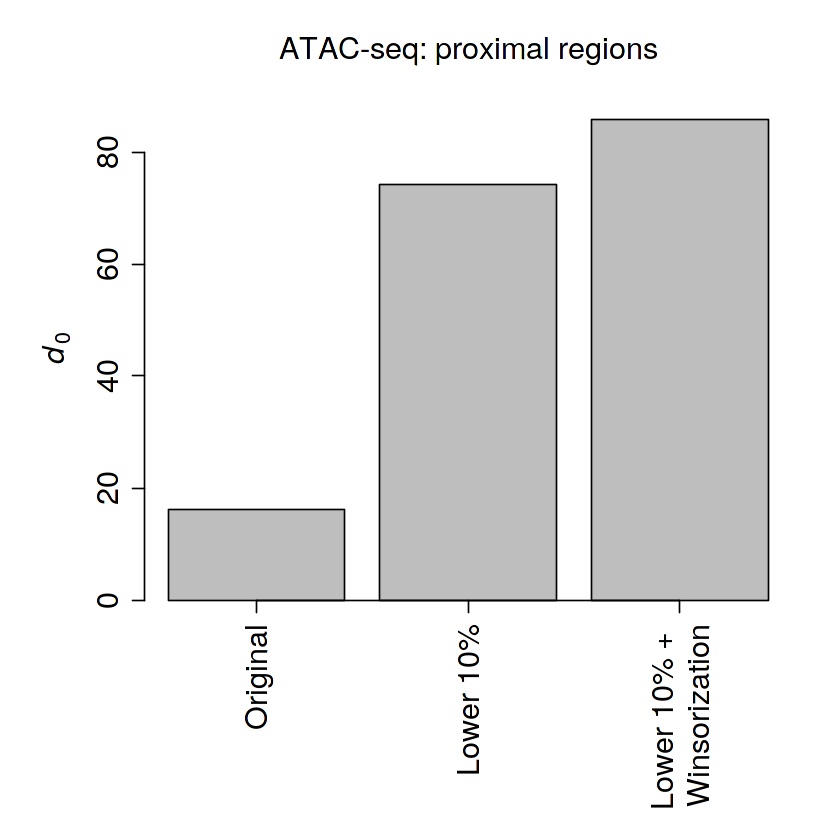

In [2]:
d0s<-c()

path<-'/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/5kb/ATAC/proximal_peaks_5kb.txt'
reads_count<-c(4,c(6:9),c(11:39))
occupancy<-c(40,c(42:45),c(47:75))
raw_reads_count<-read.table(path,header=T,sep='\t')
normalized.data<-MAnorm2::normalize(raw_reads_count,reads_count,occupancy,offset=0.5,
                                    baseline='pseudo-reference')

biocond<-bioCond(normalized.data[reads_count],
                 normalized.data[occupancy],
                 occupy.num=1,name='Tumor')


conds.list<-list(biocond)

method<-'loc'
conds.list.fit<-fitMeanVarCurve(conds.list,method=method,occupy.only=F,args.lp=list(nn=1.0))
d0s<-append(d0s,conds.list.fit[[1]]$fit.info$df.prior)

biocond<-bioCond(normalized.data[reads_count],
                 normalized.data[occupancy],
                 occupy.num=1,name='Tumor')



biocond$occupancy<-c(biocond$sample.mean<quantile(biocond$sample.mean,0.1))
conds.list<-list(biocond)

method<-'loc'
conds.list.fit<-fitMeanVarCurve(conds.list,method=method,occupy.only=F,args.lp=list(nn=1.0))
conds.list.fit<-estimatePriorDf(conds.list.fit,occupy.only=T)
d0s<-append(d0s,conds.list.fit[[1]]$fit.info$df.prior)


biocond<-bioCond(normalized.data[reads_count],
                 normalized.data[occupancy],
                 occupy.num=1,name='Tumor')

biocond$occupancy<-c(biocond$sample.mean<quantile(biocond$sample.mean,0.1))
conds.list<-list(biocond)

method<-'loc'
conds.list.fit<-fitMeanVarCurve(conds.list,method=method,occupy.only=F,args.lp=list(nn=1.0))
conds.list.fit<-estimatePriorDfRobust(conds.list.fit,occupy.only=T)
d0s<-append(d0s,conds.list.fit[[1]]$fit.info$df.prior)


#------------------------------------------------------------
#Figure4
#------------------------------------------------------------


par(mar=c(10,6,4,2),cex.main=1,font.main=1)
barplot(d0s,ylim=c(0,90),ylab=expression(italic(d[0])),
        main='ATAC-seq: proximal regions',
        cex.lab=1.5,cex.axis=1.5,cex.main=1.5)

axis(side=1,at=c(0.7,1.9,3.1),
     labels=c('Original','Lower 10%','Lower 10% + \nWinsorization'),
     cex.axis=1.5,las=2)

